<img align="left" src="images/GMIT-logo.png" alt="GMIT" width="250"/>                                                      <img align="right" src="images/data-analytics.png" alt="HDipDA" width="300"/>  

# <center>Fundamentals of Data Analysis - Tips Project 2019</center> #

***
**Module Name**: Fundamentals of Data Analysis  
**Module Number**: 52446  
**Student Name**: Yvonne Brady  
**Student ID**: G00376355  
***

### Description - 30%###
Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment. Within the repository, create a jupyter notebook that uses descriptive statistics and plots to describe the tips dataset. This part is worth 30% of your overall mark.

One waiter recorded information about each tip he received over a period of a few months working in one restaurant. They recorded several variables:
- _*total_bill*_ : Total Bill Amount
- _*tip*_ : Tip amount
- _*sex*_ : Gender of bill payer
- _*smoker*_ : Whether they were a smoker or not
- _*day*_ : What day of the week the transaction occurred
- _*time*_ : Whether the diner was being server lunch or dinner

In [1]:
# First of all import all the packages you need
# The importation of a lot of packages may have adverse affects on the performance of your script
# but this is not important for this dataset and investigation. 
# Should enhanced performance be required, the importation packages may be rethought. 

import numpy as np # foundation of all data processing packages
import pandas as pd # using dataframes etc
import matplotlib.pyplot as plt # plotting and as a basis for seaborn
import seaborn as sns # fancier plotting and statistics etc
import pandas_profiling # found this - for profiling the dataset initially
from scipy import stats # For statistics
from tabulate import tabulate # To make som etables a bit easier

# magic command to allow for easier integration of matplotlib libraries
%matplotlib inline 

# And the dataset itself (also included in this repository)
tips = sns.load_dataset("tips")

In [2]:
# Now have a look at the data
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [3]:
print("The dataset has",tips.shape[0], "rows, each with", tips.shape[1], "attributes - totalling", tips.size, "data values in the dataset.")
print("Over the data collection period, the waiter served", tips['size'].sum(), "customers, generating an income of $", tips["total_bill"].sum(), ". ")
print("This resulted in tips totalling $", tips["tip"].sum(), ".")
print("The day breakdown is as follows:")
print(tips.groupby("day").size())

The dataset has 244 rows, each with 7 attributes - totalling 1708 data values in the dataset.
Over the data collection period, the waiter served 627 customers, generating an income of $ 4827.77 . 
This resulted in tips totalling $ 731.5799999999999 .
The day breakdown is as follows:
day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64


In [4]:
# Now have a look at the data - first the initial few rows to see what they look like
tips.head(5) # returns first 5 rows

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# Then the last few rows as a check to ensure the data has not gone awry in the middle somewhere
tips.tail() # returns last 5 rows

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
# And finally a random sample to see what else there is in there
tips.sample(5) # returns 5 randomly selected rows

,total_bill,tip,sex,smoker,day,time,size
194,16.58,4.00,Male,Yes,Thur,Lunch,2
163,13.81,2.00,Male,No,Sun,Dinner,2
188,18.15,3.50,Female,Yes,Sun,Dinner,3
85,34.83,5.17,Female,No,Thur,Lunch,4
53,9.94,1.56,Male,No,Sun,Dinner,2


**Just playing around here**  
Just playing around with the data on a category by category basis to see what they show.  
Unsure of how I should present these - as code and then summarised in markdown?  
Print functions displaying data above is ugly. It is likely that a lot of what follows will be discarded in any event.

In [7]:
pcTip = tips["tip"]/tips["total_bill"]
pcTip.head()

0    0.059447
1    0.160542
2    0.166587
3    0.139780
4    0.146808
dtype: float64

In [8]:
# Create dataframes based on the categories
dinner = tips.loc[tips["time"] == "Dinner"]
lunch = tips.loc[tips["time"] == "Lunch"]
smoker = tips.loc[tips["smoker"] == "Yes"]
nonsmoker = tips.loc[tips["smoker"] == "No"]
male = tips.loc[tips["sex"] == "Male"]
female = tips.loc[tips["sex"] == "Female"]
thurs = tips.loc[tips["day"] == "Thur"]
fri = tips.loc[tips["day"] == "Fri"]
sat = tips.loc[tips["day"] == "Sat"]
sun = tips.loc[tips["day"] == "Sun"]
size1 = tips.loc[tips["size"] == 1]
size2 = tips.loc[tips["size"] == 2]
size3 = tips.loc[tips["size"] == 3]
size4 = tips.loc[tips["size"] == 4]
size5 = tips.loc[tips["size"] == 5]
size6 = tips.loc[tips["size"] == 6]

In [9]:
table = [["Gender", "Male", male["total_bill"].count(), male["total_bill"].sum(), male["tip"].sum(), (male["tip"].sum()/male["total_bill"].sum())*100], \
        ["","Female", female["total_bill"].count(), female["total_bill"].sum(), female["tip"].sum(), (female["tip"].sum()/female["total_bill"].sum())*100], \
        ["Smoking Status","Smoker", smoker["total_bill"].count(), smoker["total_bill"].sum(), smoker["tip"].sum(), (smoker["tip"].sum()/smoker["total_bill"].sum())*100], \
        ["","Non-Smoker", nonsmoker["total_bill"].count(), nonsmoker["total_bill"].sum(), nonsmoker["tip"].sum(), (nonsmoker["tip"].sum()/nonsmoker["total_bill"].sum())*100], \
        ["Time of Day","Dinner", dinner["total_bill"].count(), dinner["total_bill"].sum(), dinner["tip"].sum(), (dinner["tip"].sum()/dinner["total_bill"].sum())*100], \
        ["","Lunch", lunch["total_bill"].count(), lunch["total_bill"].sum(), lunch["tip"].sum(), (lunch["tip"].sum()/lunch["total_bill"].sum())*100], \
        ["Day","Thurs", thurs["total_bill"].count(), thurs["total_bill"].sum(), thurs["tip"].sum(), (thurs["tip"].sum()/thurs["total_bill"].sum())*100], \
        ["","Fri", fri["total_bill"].count(), fri["total_bill"].sum(), fri["tip"].sum(), (fri["tip"].sum()/fri["total_bill"].sum())*100], \
        ["","Sat", sat["total_bill"].count(), sat["total_bill"].sum(), sat["tip"].sum(), (sat["tip"].sum()/sat["total_bill"].sum())*100], \
        ["","Sun", sun["total_bill"].count(), sun["total_bill"].sum(), sun["tip"].sum(), (sun["tip"].sum()/sun["total_bill"].sum())*100], \
        ["Party Size","1", size1["total_bill"].count(), size1["total_bill"].sum(), size1["tip"].sum(), (size1["tip"].sum()/size1["total_bill"].sum())*100], \
        ["","2", size2["total_bill"].count(), size2["total_bill"].sum(), size2["tip"].sum(), (size2["tip"].sum()/size2["total_bill"].sum())*100], \
        ["","3", size3["total_bill"].count(), size3["total_bill"].sum(), size3["tip"].sum(), (size3["tip"].sum()/size3["total_bill"].sum())*100], \
        ["","4", size4["total_bill"].count(), size4["total_bill"].sum(), size4["tip"].sum(), (size4["tip"].sum()/size4["total_bill"].sum())*100], \
        ["","5", size5["total_bill"].count(), size5["total_bill"].sum(), size5["tip"].sum(), (size5["tip"].sum()/size5["total_bill"].sum())*100], \
        ["","6", size6["total_bill"].count(), size6["total_bill"].sum(), size6["tip"].sum(), (size6["tip"].sum()/size6["total_bill"].sum())*100]]

hdr = ["Category", "Classification", "Count", "Total Bills ($)", "Total Tips ($)", "Total Tip as % of Total Bill"]

print(tabulate(table, headers = hdr,  tablefmt="grid"))

+----------------+------------------+---------+-------------------+------------------+--------------------------------+
| Category       | Classification   |   Count |   Total Bills ($) |   Total Tips ($) |   Total Tip as % of Total Bill |
+================+==================+=========+===================+==================+================================+
| Gender         | Male             |     157 |           3256.82 |           485.07 |                        14.894  |
+----------------+------------------+---------+-------------------+------------------+--------------------------------+
|                | Female           |      87 |           1570.95 |           246.51 |                        15.6918 |
+----------------+------------------+---------+-------------------+------------------+--------------------------------+
| Smoking Status | Smoker           |      93 |           1930.34 |           279.81 |                        14.4954 |
+----------------+------------------+---

**General Observation**  
Based on the rudimentary calculations above, it would appear the best tip ratio is to be found if the waiter serves lunch on a Friday to a non-smoking woman dining on her own. Mind you this particular scenario accounted for exactly $0 in tips, so I guess the conclusion of this part would be - don't rely on generalities!
The most tips however would be obtained by serving a party of 2, non-smokers having dinner on a Saturday where the bill is being paid by a male.

In [10]:
(tips.groupby(["day", "time", "sex", "smoker", "size"])["tip"].sum() 
   .sort_values(ascending=False) 
   .reset_index(name='Total Tips') )

,day,time,sex,smoker,size,Total Tips
0,Sun,Dinner,Male,No,2,56.98
1,Sun,Dinner,Male,No,4,45.84
2,Sat,Dinner,Male,No,2,42.85
3,Thur,Lunch,Male,No,2,40.95
4,Sat,Dinner,Male,Yes,2,39.41
5,Thur,Lunch,Female,No,2,38.01
6,Sun,Dinner,Male,Yes,2,33.14
7,Sat,Dinner,Male,No,4,31.15
8,Sat,Dinner,Male,No,3,30.21
9,Sat,Dinner,Female,Yes,2,29.94


In [11]:
# Just checking which was the most common day and time
(tips.groupby(["day", "time"]).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count') 
   )

,day,time,count
0,Sat,Dinner,87
1,Sun,Dinner,76
2,Thur,Lunch,61
3,Fri,Dinner,12
4,Fri,Lunch,7
5,Thur,Dinner,1


In [12]:
# Just checking which was the most common scenario - Sunday dinner with two non-smoking males apparently
(tips.groupby(["day", "time", "sex", "smoker", "size"]).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count') 
   )

,day,time,sex,smoker,size,count
0,Sun,Dinner,Male,No,2,22
1,Thur,Lunch,Female,No,2,18
2,Sat,Dinner,Male,Yes,2,17
3,Sat,Dinner,Male,No,2,17
4,Thur,Lunch,Male,No,2,16
5,Sun,Dinner,Male,No,4,12
6,Sat,Dinner,Female,Yes,2,11
7,Sun,Dinner,Male,Yes,2,10
8,Sat,Dinner,Male,No,3,9
9,Thur,Lunch,Male,Yes,2,8


In [13]:
tips["day"].value_counts()
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [14]:
tips.groupby("day").describe()

total_bill                                                             \
          count       mean       std   min      25%    50%      75%    max   
day                                                                          
Thur       62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11   
Fri        19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17   
Sat        87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81   
Sun        76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17   

       tip            ...                 size                                \
     count      mean  ...     75%    max count      mean       std  min  25%   
day                   ...                                                      
Thur  62.0  2.771452  ...  3.3625   6.70  62.0  2.451613  1.066285  1.0  2.0   
Fri   19.0  2.734737  ...  3.3650   4.73  19.0  2.105263  0.567131  1.0  2.0   
Sat   87.0  2.993103  ...  3.3700  10.00  87.0  2.517241  0.819275  1.0  2.0   
Sun   76.0  3.255132  ...  4.0000   6.50  76.0  2.842105  1.007341  2.0  2.0   

                     
      50%  75%  max  
day                  
Thur  2.0  2.0  6.0  
Fri   2.0  2.0  4.0  
Sat   2.0  3.0  5.0  
Sun   2.0  4.0  6.0  

[4 rows x 24 columns]

In [15]:
# Found this and thought it was worth trying ...
profile = pandas_profiling.ProfileReport(tips)
profile

This is a really interesting summary of the data - with lots of information, both numeric and graphical contained within it.

## Start Plotting ##
First off we will look at the variables individually.  
  
_Note: This is preliminary - I will almost certainly not include everything here in final submission._

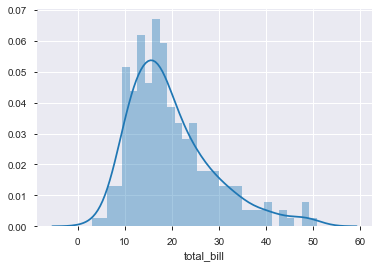

In [16]:
sns.distplot(tips['total_bill'],kde=True,bins=30)

Looking at the histogram displayed the bulk of the bills fell between the \\$10 to \\$25 bracket.

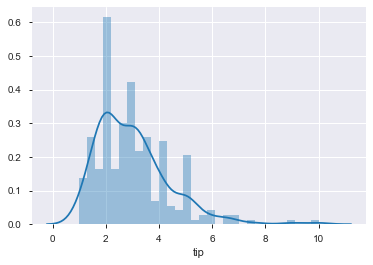

In [17]:
sns.distplot(tips['tip'],kde=True,bins=30)

And the bulk of the tips were between \\$1 and \\$3.50, with more outliers than in the bill amounts. Unlike the bill amounts though the outliers are more prevalent on the upward range.

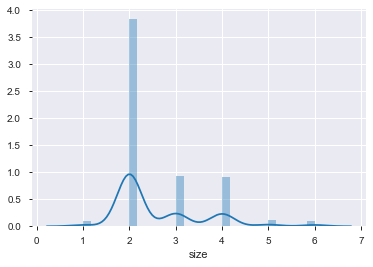

In [18]:
sns.distplot(tips['size'],kde=True,bins=30)

By far the most prevalent party size was 2 people.

## Plotting the Categorical Data ##

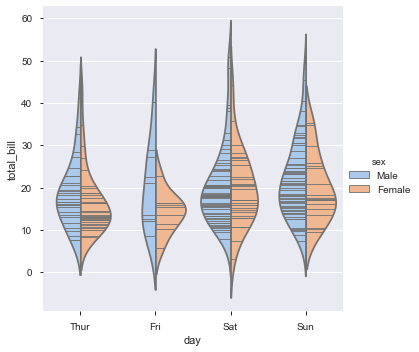

In [19]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

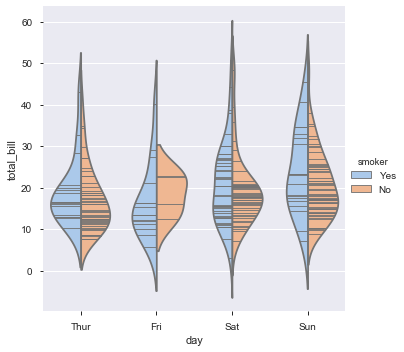

In [20]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

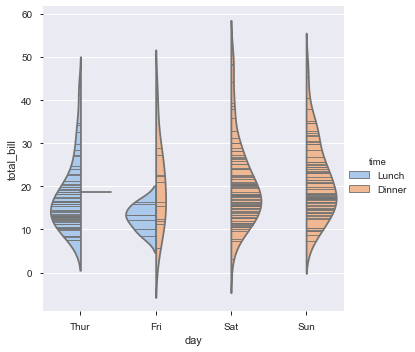

In [21]:
sns.catplot(x="day", y="total_bill", hue="time",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

## Bi-Variate Plotting ##

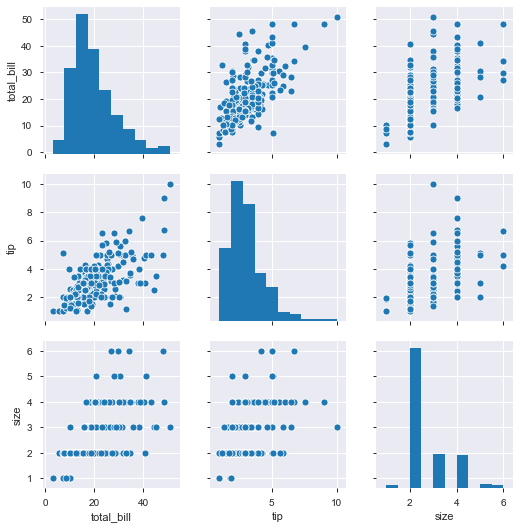

In [22]:
sns.pairplot(tips)

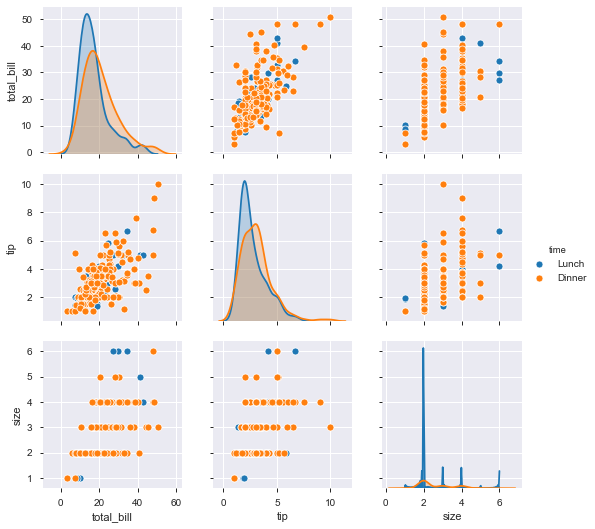

In [23]:
sns.pairplot(tips, hue = "time")

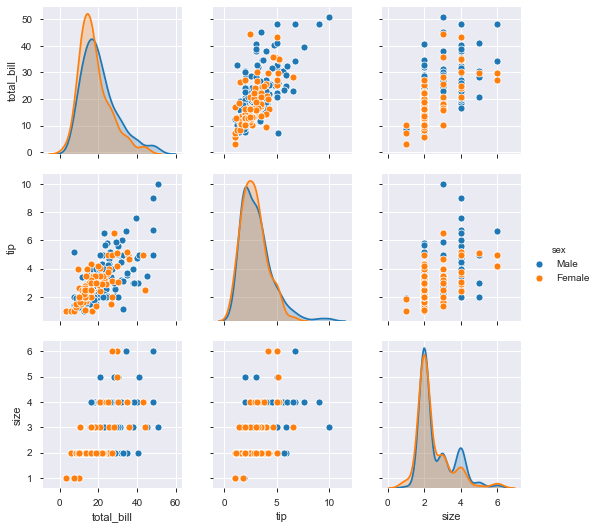

In [24]:
sns.pairplot(tips, hue = "sex")

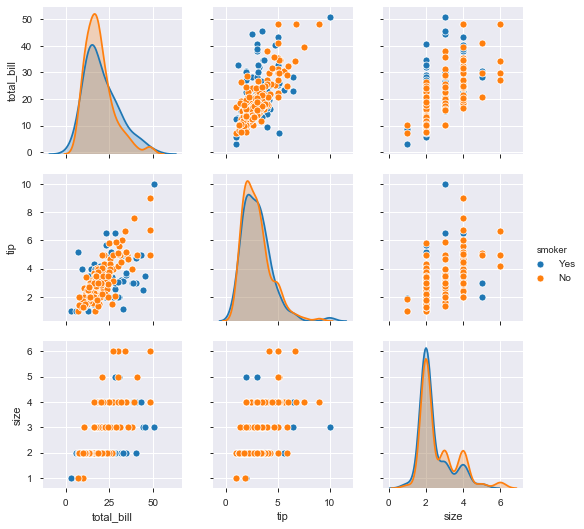

In [25]:
sns.pairplot(tips, hue = "smoker")

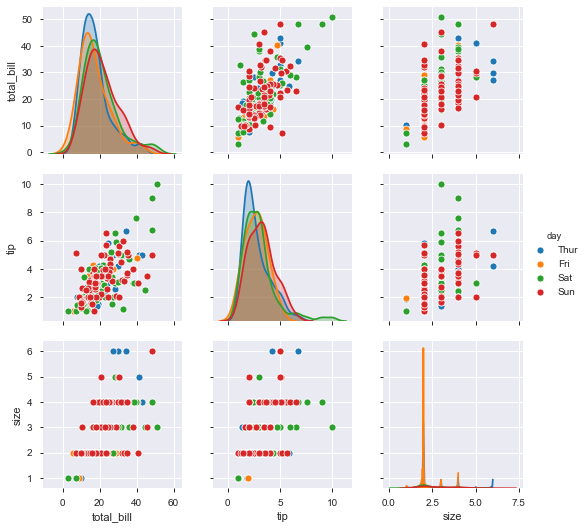

In [26]:
sns.pairplot(tips, hue = "day")

C:\Users\ybrady\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ybrady\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


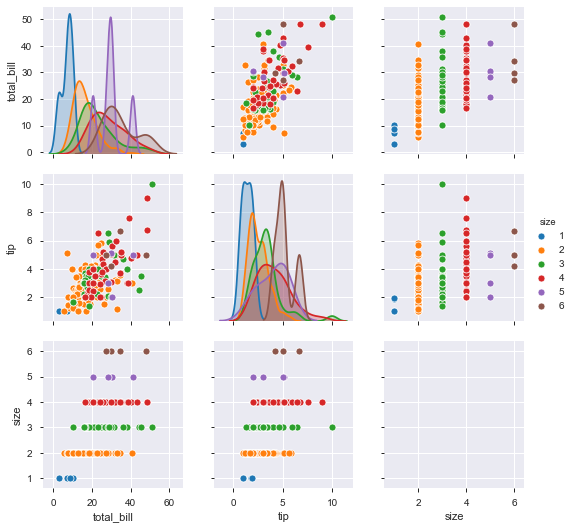

In [27]:
sns.pairplot(tips, hue = "size")

In [28]:
# Get the regression line using all the data
t_slope, t_intercept, t_r2, t_p, t_stdErr = stats.linregress(tips["total_bill"], tips["tip"])

In [29]:
# See how good a fit it is
t_r2

0.6757341092113641

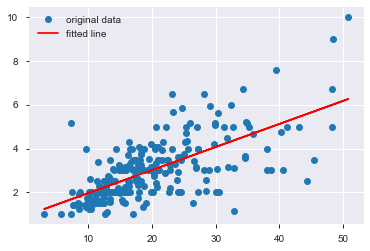

In [30]:
# Plot both the raw data and the "best fit" line
plt.plot(tips["total_bill"], tips["tip"], 'o', label='original data')
plt.plot(tips["total_bill"], t_intercept + t_slope*tips["total_bill"], 'r', label='fitted line')
plt.legend()
plt.show()

In [31]:
# Time of day comparison
# Get the regression line using all the data
d_slope, d_intercept, d_r2, d_p, d_stdErr = stats.linregress(dinner["total_bill"], dinner["tip"])
l_slope, l_intercept, l_r2, l_p, l_stdErr = stats.linregress(lunch["total_bill"], lunch["tip"])
print("r^2 dinner (Dataset size", len(dinner.index), "rows) = ", d_r2)
print("r^2 lunch (Dataset size", len(lunch.index), "rows) = ", l_r2)

r^2 dinner (Dataset size 176 rows) =  0.632871246985668
r^2 lunch (Dataset size 68 rows) =  0.8054238363495536


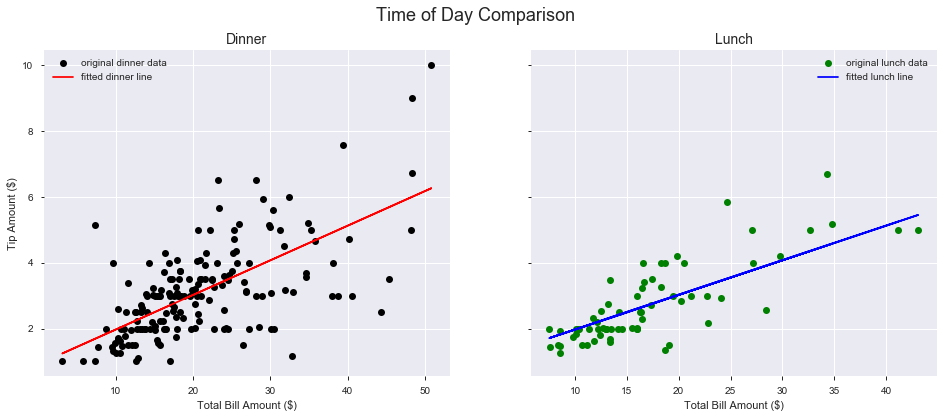

In [32]:
plt.rcParams['figure.figsize'] = [16, 6]

# Plot both the raw data and the "best fit" lines
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(dinner["total_bill"], dinner["tip"], 'ko', label='original dinner data')
ax1.plot(dinner["total_bill"], t_intercept + t_slope*dinner["total_bill"], 'r', label='fitted dinner line')
ax1.legend()
ax2.plot(lunch["total_bill"], lunch["tip"], 'go', label='original lunch data')
ax2.plot(lunch["total_bill"], t_intercept + t_slope*lunch["total_bill"], 'b', label='fitted lunch line')
ax2.legend()

# Set labels
ax1.set_xlabel('Total Bill Amount ($)')
ax2.set_xlabel('Total Bill Amount ($)')
ax1.set_ylabel('Tip Amount ($)')
fig.suptitle('Time of Day Comparison', fontsize=18)
ax1.set_title('Dinner',fontsize=14)
ax2.set_title('Lunch',fontsize=14)
plt.show()

In [33]:
# Smoker comparison
# Get the regression line using all the data
s_slope, s_intercept, s_r2, s_p, s_stdErr = stats.linregress(smoker["total_bill"], smoker["tip"])
ns_slope, ns_intercept, ns_r2, ns_p, ns_stdErr = stats.linregress(nonsmoker["total_bill"], nonsmoker["tip"])
print("r^2 smokers (Dataset size", len(smoker.index), "rows) = ", s_r2)
print("r^2 non-smokers (Dataset size", len(nonsmoker.index), "rows) = ", ns_r2)

r^2 smokers (Dataset size 93 rows) =  0.48821794116281036
r^2 non-smokers (Dataset size 151 rows) =  0.8221826257050836


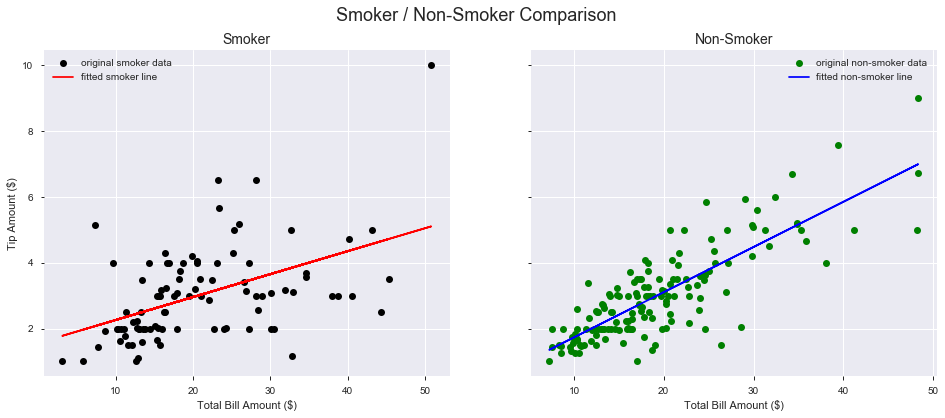

In [34]:
plt.rcParams['figure.figsize'] = [16, 6]
#fig=plt.figure(figsize=(5, 10),  facecolor='w', edgecolor='k')
# Plot both the raw data and the "best fit" lines
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(smoker["total_bill"], smoker["tip"], 'ko', label='original smoker data')
ax1.plot(smoker["total_bill"], s_intercept + s_slope*smoker["total_bill"], 'r', label='fitted smoker line')
ax1.legend()
ax2.plot(nonsmoker["total_bill"], nonsmoker["tip"], 'go', label='original non-smoker data')
ax2.plot(nonsmoker["total_bill"], ns_intercept + ns_slope*nonsmoker["total_bill"], 'b', label='fitted non-smoker line')
ax2.legend()

# Set labels
ax1.set_xlabel('Total Bill Amount ($)')
ax2.set_xlabel('Total Bill Amount ($)')
ax1.set_ylabel('Tip Amount ($)')
fig.suptitle('Smoker / Non-Smoker Comparison', fontsize=18)
ax1.set_title('Smoker',fontsize=14)
ax2.set_title('Non-Smoker',fontsize=14)
plt.show()

In [35]:
# Gender comparison
# Get the regression line using all the data
m_slope, m_intercept, m_r2, m_p, m_stdErr = stats.linregress(male["total_bill"], male["tip"])
f_slope, f_intercept, f_r2, f_p, f_stdErr = stats.linregress(female["total_bill"], female["tip"])
print("r^2 male (Dataset size", len(male.index), "rows) = ", m_r2)
print("r^2 female (Dataset size", len(female.index), "rows) = ", f_r2)

r^2 male (Dataset size 157 rows) =  0.6697529858911426
r^2 female (Dataset size 87 rows) =  0.6829992918122414


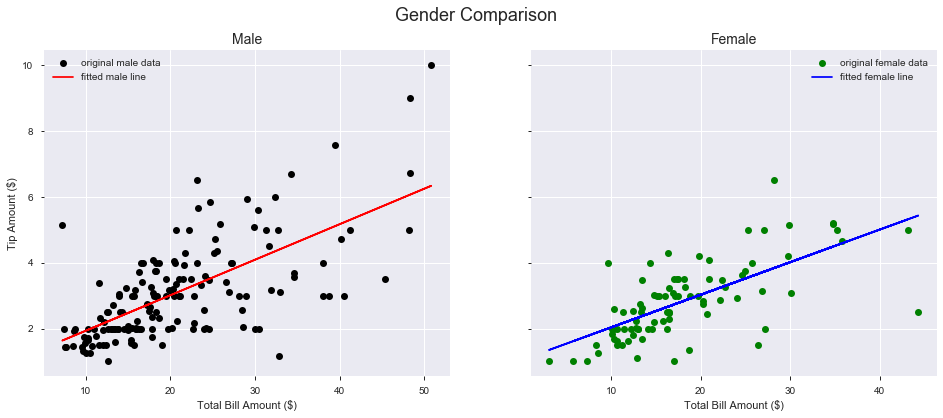

In [36]:
plt.rcParams['figure.figsize'] = [16, 6]
#fig=plt.figure(figsize=(5, 10),  facecolor='w', edgecolor='k')
# Plot both the raw data and the "best fit" lines
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(male["total_bill"], male["tip"], 'ko', label='original male data')
ax1.plot(male["total_bill"], m_intercept + m_slope*male["total_bill"], 'r', label='fitted male line')
ax1.legend()
ax2.plot(female["total_bill"], female["tip"], 'go', label='original female data')
ax2.plot(female["total_bill"], f_intercept + f_slope*female["total_bill"], 'b', label='fitted female line')
ax2.legend()

# Set labels
ax1.set_xlabel('Total Bill Amount ($)')
ax2.set_xlabel('Total Bill Amount ($)')
ax1.set_ylabel('Tip Amount ($)')
fig.suptitle('Gender Comparison', fontsize=18)
ax1.set_title('Male',fontsize=14)
ax2.set_title('Female',fontsize=14)
plt.show()

In [37]:
# Party Size comparison
# Get the regression line using all the data
s1_slope, s1_intercept, s1_r2, s1_p, s1_stdErr = stats.linregress(size1["total_bill"], size1["tip"])
s2_slope, s2_intercept, s2_r2, s2_p, s2_stdErr = stats.linregress(size2["total_bill"], size2["tip"])
s3_slope, s3_intercept, s3_r2, s3_p, s3_stdErr = stats.linregress(size3["total_bill"], size3["tip"])
s4_slope, s4_intercept, s4_r2, s4_p, s4_stdErr = stats.linregress(size4["total_bill"], size4["tip"])
s5_slope, s5_intercept, s5_r2, s5_p, s5_stdErr = stats.linregress(size5["total_bill"], size5["tip"])
s6_slope, s6_intercept, s6_r2, s6_p, s6_stdErr = stats.linregress(size6["total_bill"], size6["tip"])
print("r^2 Party Size 1 (Dataset size", len(size1.index), "rows) = ", s1_r2)
print("r^2 Party Size 2 (Dataset size", len(size2.index), "rows) = ", s2_r2)
print("r^2 Party Size 3 (Dataset size", len(size3.index), "rows) = ", s3_r2)
print("r^2 Party Size 4 (Dataset size", len(size4.index), "rows) = ", s4_r2)
print("r^2 Party Size 5 (Dataset size", len(size5.index), "rows) = ", s5_r2)
print("r^2 Party Size 6 (Dataset size", len(size6.index), "rows) = ", s6_r2)

r^2 Party Size 1 (Dataset size 4 rows) =  0.7819380610281642
r^2 Party Size 2 (Dataset size 156 rows) =  0.4811509958463354
r^2 Party Size 3 (Dataset size 38 rows) =  0.5897440237023541
r^2 Party Size 4 (Dataset size 37 rows) =  0.6760879540843564
r^2 Party Size 5 (Dataset size 5 rows) =  0.062186249409241744
r^2 Party Size 6 (Dataset size 4 rows) =  0.10535541767159408


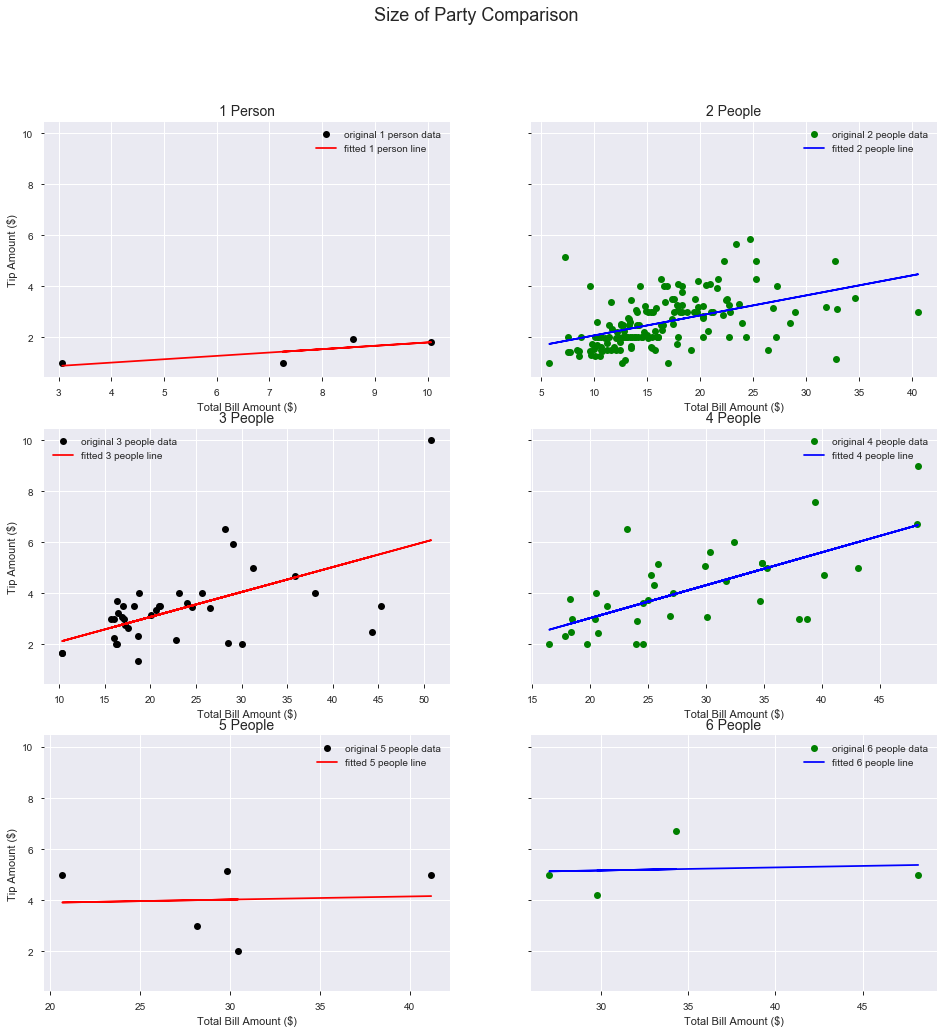

In [38]:
plt.rcParams['figure.figsize'] = [16,16]

# Plot both the raw data and the "best fit" lines
fig, ((ax1, ax2), (ax3, ax4), ( ax5, ax6)) = plt.subplots(3, 2, sharey=True)

ax1.plot(size1["total_bill"], size1["tip"], 'ko', label='original 1 person data')
ax1.plot(size1["total_bill"], s1_intercept + s1_slope*size1["total_bill"], 'r', label='fitted 1 person line')
ax1.legend()
ax2.plot(size2["total_bill"], size2["tip"], 'go', label='original 2 people data')
ax2.plot(size2["total_bill"], s2_intercept + s2_slope*size2["total_bill"], 'b', label='fitted 2 people line')
ax2.legend()
ax3.plot(size3["total_bill"], size3["tip"], 'ko', label='original 3 people data')
ax3.plot(size3["total_bill"], s3_intercept + s3_slope*size3["total_bill"], 'r', label='fitted 3 people line')
ax3.legend()
ax4.plot(size4["total_bill"], size4["tip"], 'go', label='original 4 people data')
ax4.plot(size4["total_bill"], s4_intercept + s4_slope*size4["total_bill"], 'b', label='fitted 4 people line')
ax4.legend()
ax5.plot(size5["total_bill"], size5["tip"], 'ko', label='original 5 people data')
ax5.plot(size5["total_bill"], s5_intercept + s5_slope*size5["total_bill"], 'r', label='fitted 5 people line')
ax5.legend()
ax6.plot(size6["total_bill"], size6["tip"], 'go', label='original 6 people data')
ax6.plot(size6["total_bill"], s6_intercept + s6_slope*size6["total_bill"], 'b', label='fitted 6 people line')
ax6.legend()

# Set labels
ax1.set_xlabel('Total Bill Amount ($)')
ax2.set_xlabel('Total Bill Amount ($)')
ax3.set_xlabel('Total Bill Amount ($)')
ax4.set_xlabel('Total Bill Amount ($)')
ax5.set_xlabel('Total Bill Amount ($)')
ax6.set_xlabel('Total Bill Amount ($)')
ax1.set_ylabel('Tip Amount ($)')
ax3.set_ylabel('Tip Amount ($)')
ax5.set_ylabel('Tip Amount ($)')
fig.suptitle('Size of Party Comparison', fontsize=18)
ax1.set_title('1 Person',fontsize=14)
ax2.set_title('2 People',fontsize=14)
ax3.set_title('3 People',fontsize=14)
ax4.set_title('4 People',fontsize=14)
ax5.set_title('5 People',fontsize=14)
ax6.set_title('6 People',fontsize=14)
plt.show()

In [39]:

table = [["Smokers", len(smoker.index), s_slope, s_intercept, s_r2, s_p, s_stdErr], \
         ["Non-Smokers", len(nonsmoker.index), ns_slope, ns_intercept, ns_r2, ns_p, ns_stdErr], \
         ["Male", len(male.index), m_slope, m_intercept, m_r2, m_p, m_stdErr], \
         ["Female", len(female.index), f_slope, f_intercept, f_r2, f_p, f_stdErr], \
         ["Lunch", len(lunch.index), l_slope, l_intercept, l_r2, l_p, l_stdErr], \
         ["Dinner", len(dinner.index), d_slope, d_intercept, d_r2, d_p, d_stdErr], \
         ["Party of 1", len(size1.index), s1_slope, s1_intercept, s1_r2, s1_p, s1_stdErr], \
         ["Party of 2", len(size2.index), s2_slope, s2_intercept, s2_r2, s2_p, s2_stdErr], \
         ["Party of 3", len(size3.index), s3_slope, s3_intercept, s3_r2, s3_p, s3_stdErr], \
         ["Party of 4", len(size4.index), s4_slope, s4_intercept, s4_r2, s4_p, s4_stdErr], \
         ["Party of 5", len(size5.index), s5_slope, s5_intercept, s5_r2, s5_p, s5_stdErr], \
         ["Party of 6", len(size6.index), s6_slope, s6_intercept, s6_r2, s6_p, s6_stdErr]]
hdr = ["Category", "Sample Size", "Slope", "Intercept", "R^2 Value", "P-Value", "Std Error"]
print(tabulate(table, headers = hdr,  tablefmt="grid"))

+-------------+---------------+-----------+-------------+-------------+-------------+-------------+
| Category    |   Sample Size |     Slope |   Intercept |   R^2 Value |     P-Value |   Std Error |
+=============+===============+===========+=============+=============+=============+=============+
| Smokers     |            93 | 0.0695902 |    1.56427  |   0.488218  | 6.89401e-07 |  0.0130404  |
+-------------+---------------+-----------+-------------+-------------+-------------+-------------+
| Non-Smokers |           151 | 0.137156  |    0.360069 |   0.822183  | 2.72556e-38 |  0.00777922 |
+-------------+---------------+-----------+-------------+-------------+-------------+-------------+
| Male        |           157 | 0.107861  |    0.852148 |   0.669753  | 8.75758e-22 |  0.00960568 |
+-------------+---------------+-----------+-------------+-------------+-------------+-------------+
| Female      |            87 | 0.0988779 |    1.04802  |   0.682999  | 3.15953e-13 |  0.0114694  |


### Regression - 30% ###
To the above jupyter notebook add a section that discusses and analyses whether there is a relationship between the total bill and tip amount, and this part is also worth 30%.

### Analysis - 40% ###
Again using the same notebook, analyse the relationship between the variables within the dataset. You are free to interpret this as you wish — for example, you may analyse all pairs of variables, or select a subset and analyse those. This part is worth 40%.

### References ###
[1] https://github.com/mwaskom/seaborn-data/blob/master/tips.csv.  
[2] https://rdrr.io/cran/regclass/man/TIPS.html  
[3] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html